In [13]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Exploration and Loading**

In [14]:
# Importing the dataset
dataset = pd.read_csv('/content/sample_data/ParisHousing.csv')
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [15]:
# Check for missing values
print(dataset.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


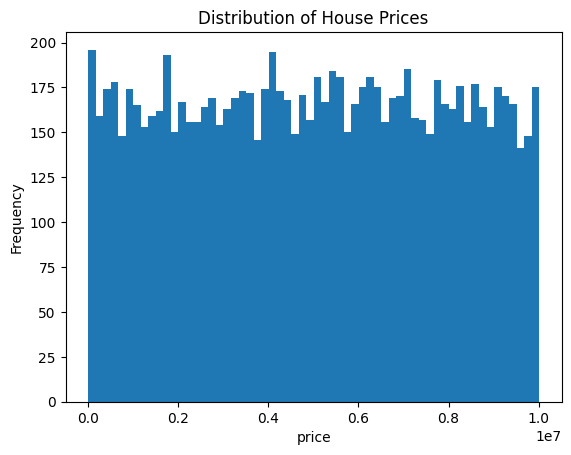

In [16]:
# Visualize the data (example: histogram of house prices)
plt.hist(dataset['price'], bins=60,)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

# **2. Feature Selection**

* <h4>Feature Importance</h4>

In [17]:
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model
model=RandomForestRegressor()
# Fit the model on the training data
X_train=dataset[['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom',
'hasGuestRoom']]
y_train=dataset['price']
model.fit(X_train,y_train)
# Get feature importances
feature_importances = model.feature_importances_
# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

squareMeters: 0.9999989597164669
numberOfRooms: 9.637160317220147e-08
hasYard: 3.2028701373008616e-08
hasPool: 3.272695829103881e-08
floors: 1.3200291731856365e-07
cityCode: 9.679301485668535e-08
cityPartRange: 6.675876368307968e-08
numPrevOwners: 6.844135218490417e-08
made: 8.83520773280902e-08
isNewBuilt: 2.0193124091685775e-08
hasStormProtector: 1.778134289116524e-08
basement: 9.628098417043188e-08
attic: 1.071052668559717e-07
garage: 9.4869880292518e-08
hasStorageRoom: 2.1311557190948967e-08
hasGuestRoom: 6.926598930595749e-08


* <h4>Correlation Analysis:</h4>

In [18]:
correlation_matrix=dataset.corr()
# Look at the correlations with the 'Price' column
feature_coorelation=correlation_matrix["price"].sort_values(ascending=False)
print (feature_coorelation)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='squareMeters'>

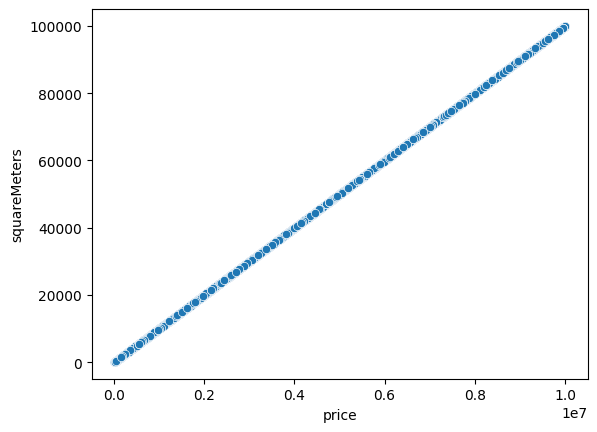

In [19]:
# we found a strong correlation between the price and the squareMeters features
sns.scatterplot(dataset,x="price",y="squareMeters")

# **3. Feature Engineering:**

* <h4>Create New Features:</h4>

In [20]:
import datetime
current_year=datetime.datetime.now().year
dataset['ageOfProperty']=current_year - dataset['made']
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,ageOfProperty
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,19
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,9
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,3
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,12
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,34


# **4.Data Splitting:**

In [21]:
from sklearn.model_selection import train_test_split# we Define our features (X) and target variable (y)
X = dataset.drop(columns=['price'])  # Features
y = dataset['price']  # Target variable

# we Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we have to X_train, X_test, y_train, and y_test for training and evaluation.

# **5.Model Selection**

**<h4>.Model Training</h4>**

In [22]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

**<h4>.Model Evaluation</h4>**

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 1510.0341808542357
Mean Squared Error: 3695708.440619071
Root Mean Squared Error: 1922.4225447645663


# **6.Prediction**

In [24]:
# Define and assign values to the variables for the new house
new_square_meters = float(input("Enter the square meters of the new house: "))
new_number_of_rooms = int(input("Enter the number of rooms in the new house: "))
new_has_yard = int(input("Does the new house have a yard? (1 for Yes, 0 for No): "))
new_has_pool = int(input("Does the new house have a pool? (1 for Yes, 0 for No): "))
new_floors = int(input("Enter the number of floors in the new house: "))
new_city_code = int(input("Enter the city code of the new house: "))
new_city_part_range = int(input("Enter the city part range of the new house: "))
new_num_prev_owners = int(input("Enter the number of previous owners of the new house: "))
new_construction_year = int(input("Enter the construction year of the new house: "))
new_is_new_built = int(input("Is the new house newly built? (1 for Yes, 0 for No): "))
new_has_storm_protector = int(input("Does the new house have a storm protector? (1 for Yes, 0 for No): "))
new_basement = int(input("Does the new house have a basement? (1 for Yes, 0 for No): "))
new_attic = int(input("Does the new house have an attic? (1 for Yes, 0 for No): "))
new_garage = int(input("Does the new house have a garage? (1 for Yes, 0 for No): "))
new_has_storage_room = int(input("Does the new house have a storage room? (1 for Yes, 0 for No): "))
new_has_guest_room = int(input("Does the new house have a guest room? (1 for Yes, 0 for No): "))
new_ageOfProperty = current_year - new_construction_year  # Calculate age of the property

Enter the square meters of the new house: 75523
Enter the number of rooms in the new house: 3
Does the new house have a yard? (1 for Yes, 0 for No): 0
Does the new house have a pool? (1 for Yes, 0 for No): 1
Enter the number of floors in the new house: 63
Enter the city code of the new house: 9373
Enter the city part range of the new house: 3
Enter the number of previous owners of the new house: 8
Enter the construction year of the new house: 2005
Is the new house newly built? (1 for Yes, 0 for No): 0
Does the new house have a storm protector? (1 for Yes, 0 for No): 1
Does the new house have a basement? (1 for Yes, 0 for No): 4313
Does the new house have an attic? (1 for Yes, 0 for No): 9005
Does the new house have a garage? (1 for Yes, 0 for No): 956
Does the new house have a storage room? (1 for Yes, 0 for No): 0
Does the new house have a guest room? (1 for Yes, 0 for No): 7


In [25]:
# Create a DataFrame for the new house features
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'made': [new_construction_year],
    'isNewBuilt': [new_is_new_built],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
    'ageOfProperty':[new_ageOfProperty]

})

In [26]:
# Now we can proceed with making predictions using the trained model
predicted_price = model.predict(new_house_features)
print(f"The Predicted Price: €{predicted_price[0]:.2f}")

The Predicted Price: €7559285.94
